# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Для воспроизводимости результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [3]:
import pandas as pd

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [5]:
# Отобразите 30 случайных строк тренировочного датасета
df_train.sample(30)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [53]:
# Отобразите первые 5 тестового датасета
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498,112.00,7,Mahindra
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497,108.50,5,Tata
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799,130.00,5,Honda
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498,98.60,5,Honda
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172,65.00,5,Tata


In [7]:
# Отобразите последние 5 объектов тестового датасета
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [8]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
# 1) Тренировочный датасет
display(df_train.isna().sum())
missing_columns = list(df_train.columns[df_train.isna().sum() > 0])
print("Колонки с пропусками:", missing_columns)

df_train.info()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,202
engine,202


Колонки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [9]:
# Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
# 2) Тестовый датасет
display(df_test.isna().sum())
missing_columns = list(df_test.columns[df_test.isna().sum() > 0])
print("Колонки с пропусками:", missing_columns)

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,19
engine,19


Колонки с пропусками: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [10]:
# Посмотрите, есть ли в данных явные дубликаты
# Сделаем только по тренировочному - дубликаты есть
df_train.duplicated().sum()

np.int64(985)

In [11]:
!pip install ydata-profiling


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.1 MB/s eta 0:00:00


In [12]:
from ydata_profiling import ProfileReport

profile = ProfileReport(
    df_train,
    title="EDA отчет: Cars Train Dataset",
    explorative=True
)

profile


Output hidden; open in https://colab.research.google.com to view.

**Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?**

Можно
- Какие типы данных скорее всего есть в столбцах и намек на то нужна ли конвертация данных/очистка
- Примеры значений признаков, намек на диапазон
- Намек на то упорядочены данные или нет
- Наличие пропусков

Нельзя
- Разброс данных
- Статистические свойства данных
- Корреляции между признаками и возможная линейная зависимость

**Достаточно ли метода duplicated для анализа дубликатов? Почему?**
Нет, так как дубликаты могут быть по значениям признаков но не по target. Те признаки которые совпадают по всей строке кроме столбца таргета тоже надо удалить

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [13]:
# your code here
X_columns = [column for column in df_train.columns if column != 'selling_price']

flag_duplicates = df_train.duplicated(subset=X_columns, keep=False)
print("Частичных дубликатов:", flag_duplicates.sum())

display(df_train[flag_duplicates].sort_values(by=X_columns))

df_train = df_train.drop_duplicates(subset=X_columns, keep='first')

df_train = df_train.reset_index(drop=True)


Частичных дубликатов: 1799


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5753,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5991,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [14]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [15]:
# your code here
df_train["mileage"] = pd.to_numeric(df_train["mileage"].str.split().str[0], errors="coerce")
df_test["mileage"]  = pd.to_numeric(df_test["mileage"].str.split().str[0], errors="coerce")

df_train["engine"] = pd.to_numeric(df_train["engine"].str.split().str[0], errors="coerce")
df_test["engine"]  = pd.to_numeric(df_test["engine"].str.split().str[0], errors="coerce")

df_train["max_power"] = pd.to_numeric(df_train["max_power"].str.split().str[0], errors="coerce")
df_test["max_power"]  = pd.to_numeric(df_test["max_power"].str.split().str[0], errors="coerce")

df_train = df_train.drop(columns=["torque"])
df_test = df_test.drop(columns=["torque"])



In [16]:
#Проверка float
df_train[["mileage", "engine", "max_power"]].dtypes

,0
mileage,float64
engine,float64
max_power,float64


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [17]:
# your code here

from sklearn import impute

# Выбираем признаки
selected_cols = ["engine", "seats"]

# Заполняем пропуски медианой - мы их еще не заполняли.
# Делаем по-разному для train/test т.к. здесь в отличие от лекции датасеты разделены и мы можем действовать аккуратнее
mis_replacer = impute.SimpleImputer(strategy="median")

# train
df_train[selected_cols] = pd.DataFrame(
    data=mis_replacer.fit_transform(df_train[selected_cols]),
    columns=selected_cols
)

# test
df_test[selected_cols] = pd.DataFrame(
    data=mis_replacer.transform(df_test[selected_cols]),
    columns=selected_cols
)

# приводим тип к int
df_train[selected_cols] = df_train[selected_cols].astype(int)
df_test[selected_cols]  = df_test[selected_cols].astype(int)


# Дополнительно заполним пропуски в других двух переменных (эта часть почему-то опущена в задании)
additional_cols = ["mileage", "max_power"]

# train
df_train[additional_cols] = pd.DataFrame(
    data=mis_replacer.fit_transform(df_train[additional_cols]),
    columns=additional_cols
)

# test
df_test[additional_cols] = pd.DataFrame(
    data=mis_replacer.transform(df_test[additional_cols]),
    columns=additional_cols
)

# можно проверить, что пропусков больше нет
df_train.isna().sum(), df_test.isna().sum()





(name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 mileage          0
 engine           0
 max_power        0
 seats            0
 dtype: int64,
 name             0
 year             0
 selling_price    0
 km_driven        0
 fuel             0
 seller_type      0
 transmission     0
 owner            0
 mileage          0
 engine           0
 max_power        0
 seats            0
 dtype: int64)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [18]:
# your code here

# Категориальные столбцы — там, где тип данных object
cat_mask_train = (df_train.dtypes == "object").values
cat_mask_test  = (df_test.dtypes == "object").values

# Выберем числовые столбцы
num_cols_train = df_train.columns[~cat_mask_train]
num_cols_test  = df_test.columns[~cat_mask_test]

pd.set_option("display.float_format", "{:.2f}".format)

print("Числовые признаки train")
display(df_train[num_cols_train].describe())

print("Числовые признаки test")
display(df_test[num_cols_test].describe())


Числовые признаки train


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00,5840.00
mean,2013.43,522960.09,73952.24,19.43,1429.45,87.91,5.43
std,4.10,535432.00,60071.14,3.99,485.66,31.64,0.98
min,1983.00,29999.00,1.00,0.00,624.00,0.00,2.00
25%,2011.00,250000.00,39000.00,16.95,1197.00,68.00,5.00
50%,2014.00,405000.00,70000.00,19.37,1248.00,81.86,5.00
75%,2017.00,640000.00,100000.00,22.30,1498.00,99.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,14.00


Числовые признаки test


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,2013.68,617901.04,71393.34,19.34,1454.88,90.84,5.40
std,4.01,758553.86,48486.22,3.95,522.00,34.89,0.91
min,1995.00,31000.00,1303.00,0.00,624.00,34.20,4.00
25%,2011.00,250000.00,37000.00,16.55,1197.00,69.00,5.00
50%,2014.00,434999.00,61500.00,19.37,1248.00,82.42,5.00
75%,2017.00,670000.00,100000.00,22.30,1582.00,102.00,5.00
max,2020.00,6000000.00,375000.00,32.26,3604.00,280.00,9.00


In [19]:
# your code here

# Категориальные столбцы
cat_mask_train = (df_train.dtypes == "object").values
cat_mask_test  = (df_test.dtypes == "object").values

cat_cols_train = df_train.columns[cat_mask_train]
cat_cols_test  = df_test.columns[cat_mask_test]

print("Категориальные столбцы train")
display(df_train[cat_cols_train].describe())

print("Категориальные столбцы test")
display(df_test[cat_cols_test].describe())


Категориальные столбцы train


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Категориальные столбцы test


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [20]:
assert df_train.shape == (5840, 13)

AssertionError: 

**Выводы**

- Средние по признакам в train и test очень похожи - это хорошо (дает надежду на схожесть датасетов)
- Среднее по целевой переменной прилично выше в тестовой выборке - возможно туда попали более дорогие машины
- Стандартные отклонения выглядят ок везде кроме целевой переменной - у нее очень большое, похоже на сильный разброс данных. Также видим что максимальное переменной значение очень большое - подтверждает гипотезу о разбросе данных.



## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

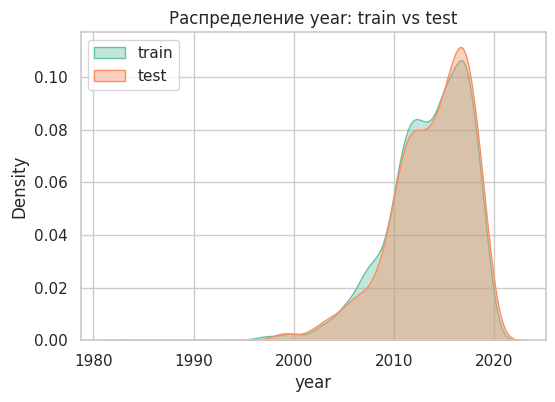

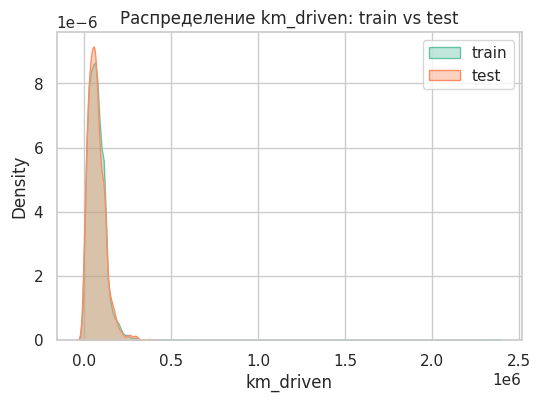

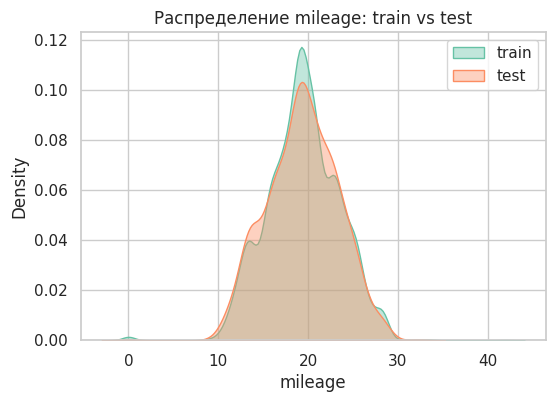

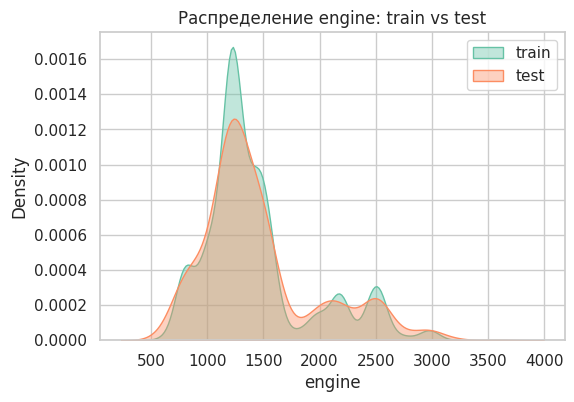

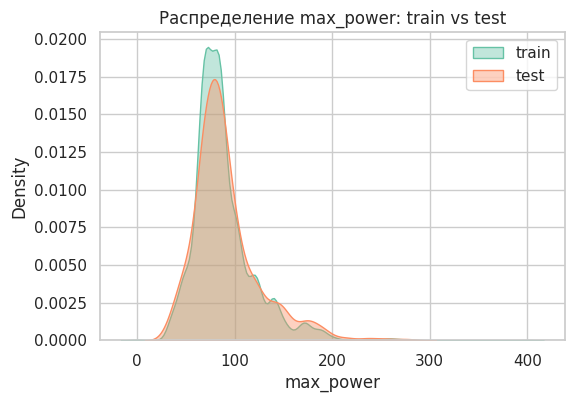

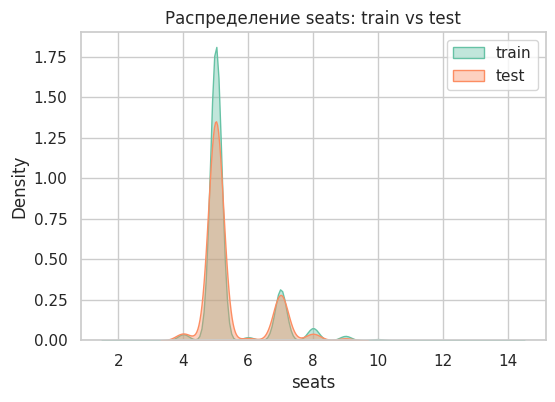

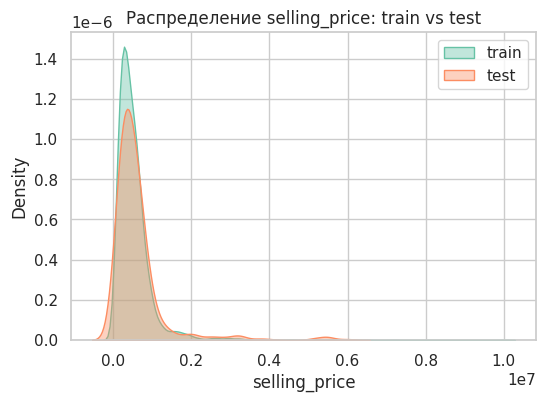

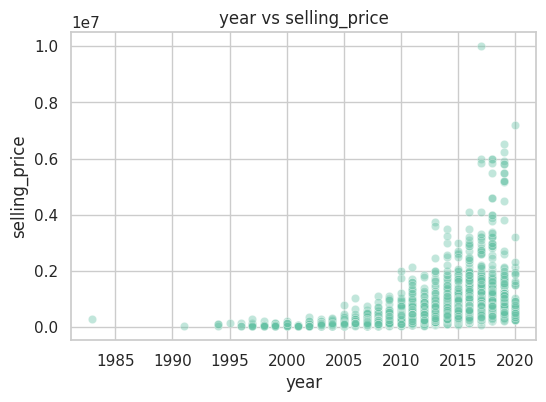

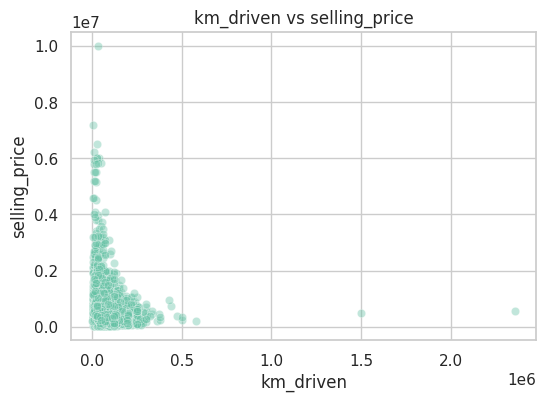

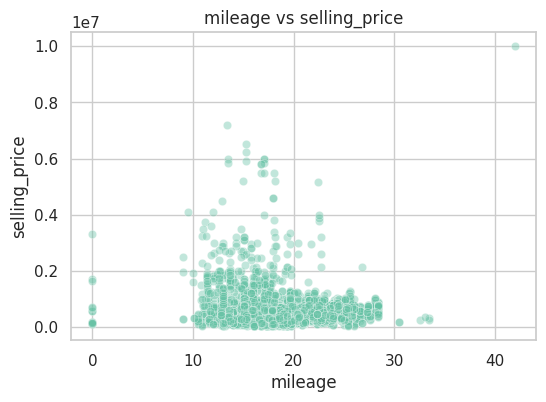

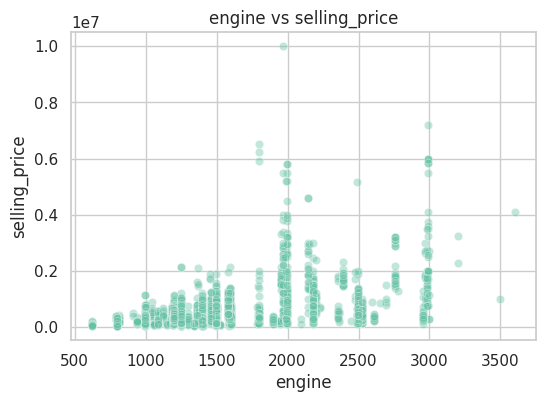

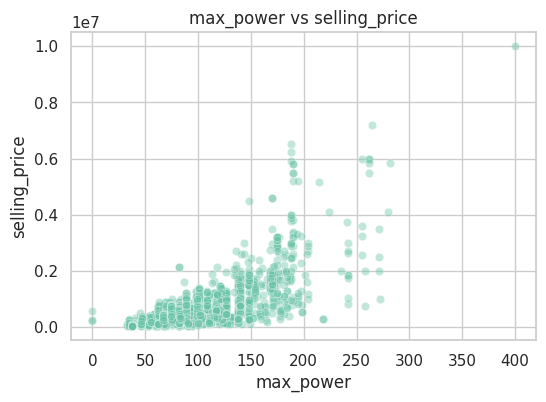

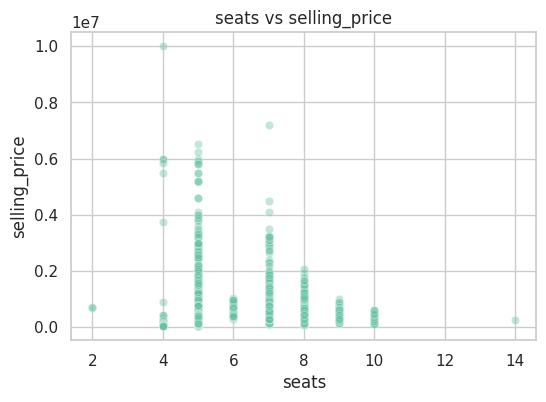

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="Set2")

# Все числовые столбцы, кроме таргета
num_cols = [col for col in df_train.columns
            if df_train[col].dtype != "object" and col != "selling_price"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df_train[col], label="train", fill=True, alpha=0.4)
    sns.kdeplot(df_test[col],  label="test",  fill=True, alpha=0.4)
    plt.title(f"Распределение {col}: train vs test")
    plt.legend()
    plt.show()

# таргет
plt.figure(figsize=(6,4))
sns.kdeplot(df_train["selling_price"], label="train", fill=True, alpha=0.4)
sns.kdeplot(df_test["selling_price"],  label="test",  fill=True, alpha=0.4)

plt.title("Распределение selling_price: train vs test")
plt.xlabel("selling_price")
plt.legend()
plt.show()


for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_train[col], y=df_train["selling_price"], alpha=0.4)
    plt.title(f"{col} vs selling_price")
    plt.show()



# Выводы
- По многим переменным распределения близки к нормальному (по некоторым немного скошены), что по идее хорошо для линейной регрессии
- Для target selling_price распределение по train и test немного не совпадает - возможна ситуация в которой модель построенная на train будет не очень хорошо предсказывать test
- Видны возможные положительные зависимости некоторых переменных c selling_price: year, engine, max_power + отрицаельная зависимость с km_driven


### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

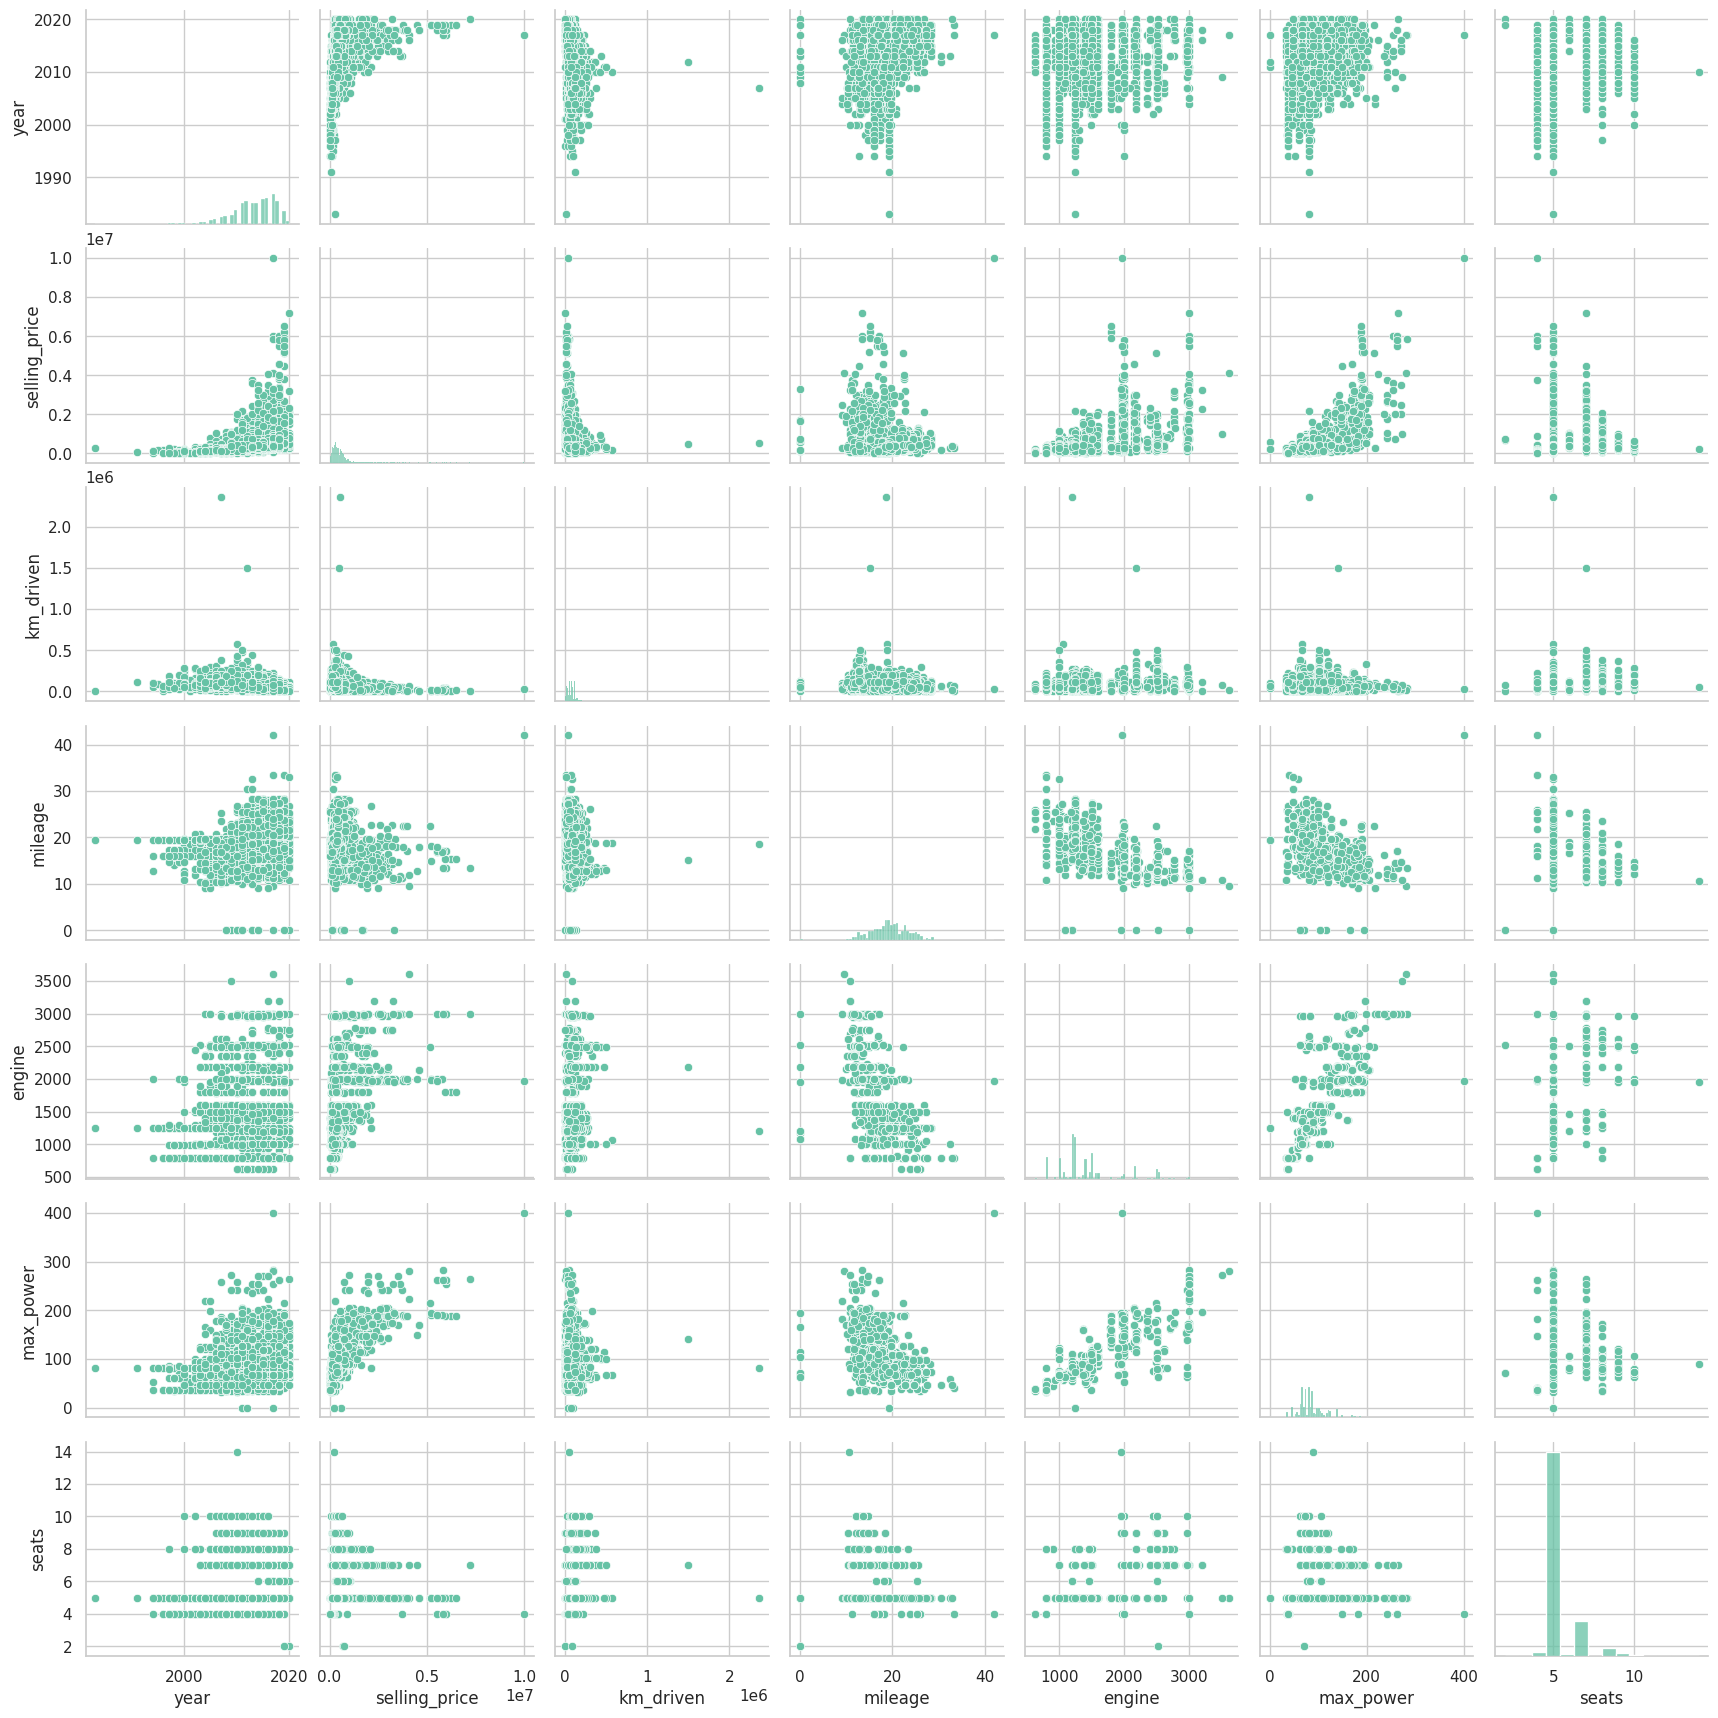

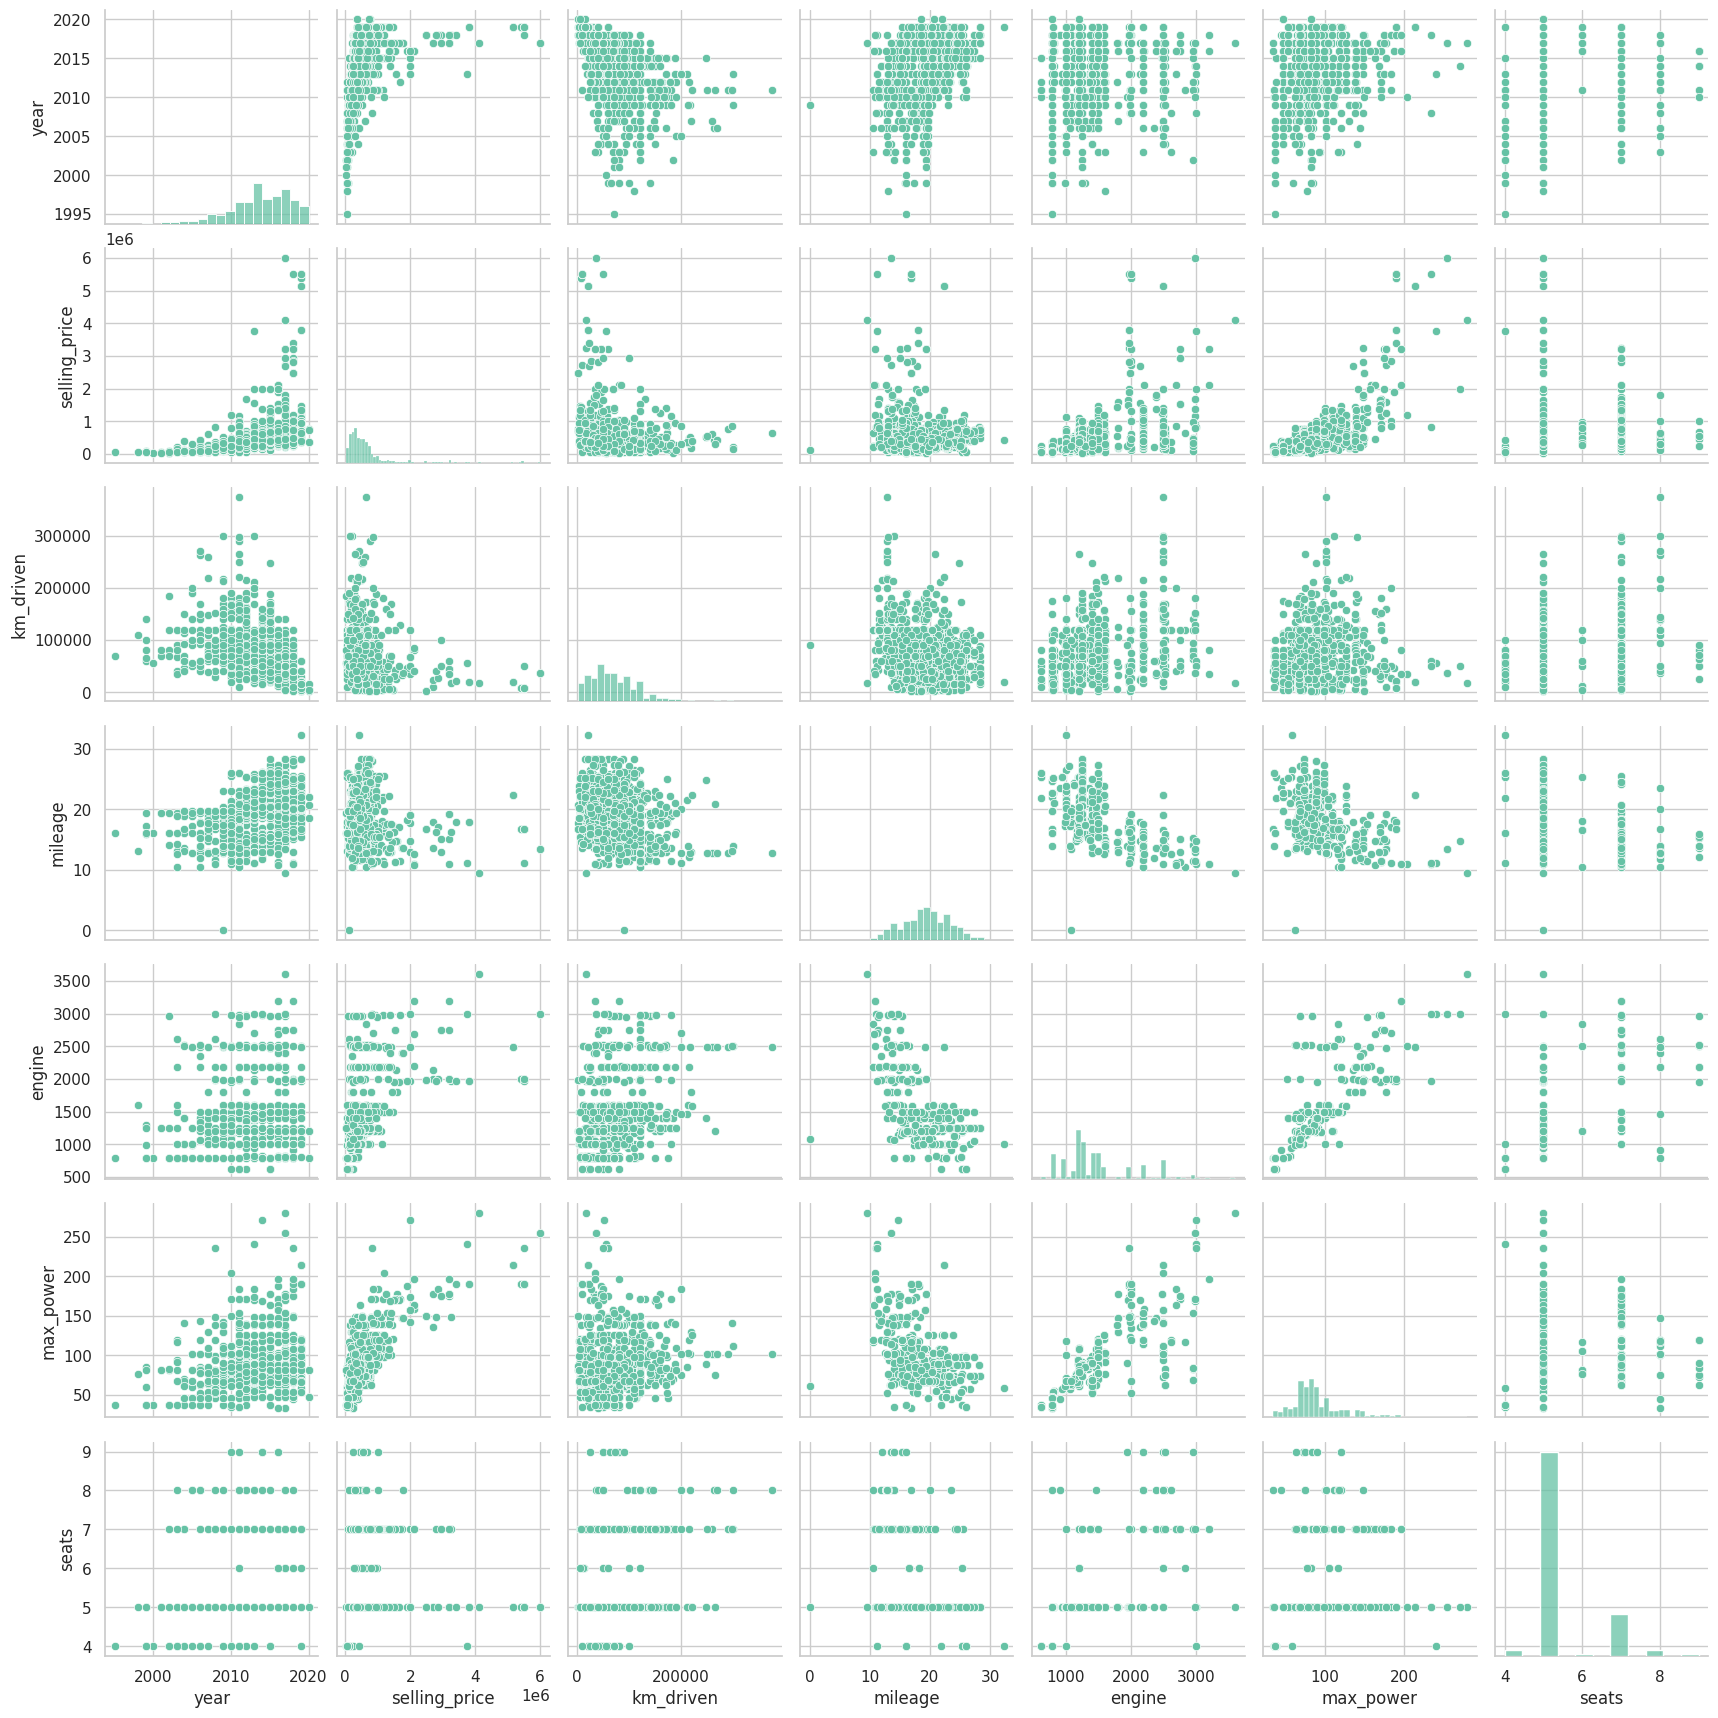

In [22]:
# your code here
import seaborn as sns

# выбираем числовые столбцы (DataFrame, как у тебя)
num_cols_train = df_train.select_dtypes(include="number")
num_cols_test  = df_test.select_dtypes(include="number")

# строим pairplot
sns.pairplot(num_cols_train)
sns.pairplot(num_cols_test)

1.
- **Можно ли предположить на основе распределений связь признаков с целевой переменной?** Да! Это мы уже делали в пункте 5, так что выводы аналогичные.
- **Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**
Да, можно! Например между признаками max_power, engine видна положительная зависимость, значит и корреляция скорее всего будет положительной

2. **Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"** Да, оказались похожими


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


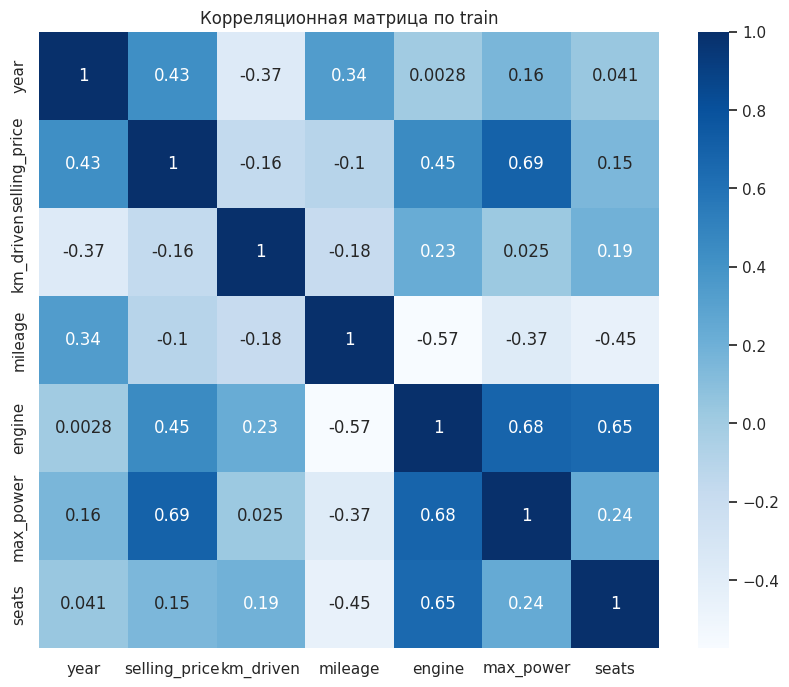

In [23]:
# your code here

import seaborn as sns

# Берём только числовые признаки (включая selling_price)
X_corr = df_train.select_dtypes(include="number")

corr_matrix = X_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="Blues", annot=True)
plt.title("Корреляционная матрица по train")
plt.show()


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) **Какие 2 признака наименее скоррелированы между собой?**
Наименьшая по модулю корреляция между признаками year и engine (0.0028) - т.е. они наименее скоррелированы между собой

2) **Между какими наблюдается довольно сильная положительная линейная зависимость?**
Исходим из предположения что имеются в виду только признаки - тогда:
a) max_power и engine - корреляция 0.68 - чем больше объем двигателя, тем больше мощность
b) seats и engine - корреляция 0.65 - авто с большим количеством мест вероятно имеют более объемный двигатель


3) **Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**
Да, т.к. корреляция между km_driven и year=-0.37 - чем меньше год, тем больше км машина проехала


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [ ]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [24]:
# бэкап датасетов до удаления категориальных
df_train_backup = df_train.copy()
df_test_backup = df_test.copy()


# берём копию train только с вещественными признаками
train_real = df_train.drop(columns=["name", "fuel", "seller_type", "transmission", "owner"])

# отделяем целевую переменную (как в Lesson1: y = ..., X = ...)
y_train = train_real["selling_price"]
X_train = train_real.drop(columns=["selling_price"])

#y_test = # your code here
#X_test = # your code here

# берём копию test только с вещественными признаками
test_real = df_test.drop(columns=["name", "fuel", "seller_type", "transmission", "owner"])

y_test = test_real["selling_price"]
X_test = test_real.drop(columns=["selling_price"])

In [25]:
#y_train = # your code here
#X_train = # your code here
# берём копию train только с вещественными признаками
train_real = df_train.drop(columns=["name", "fuel", "seller_type", "transmission", "owner"])

# отделяем целевую переменную (как в Lesson1: y = ..., X = ...)
y_train = train_real["selling_price"]
X_train = train_real.drop(columns=["selling_price"])

#y_test = # your code here
#X_test = # your code here

# берём копию test только с вещественными признаками
test_real = df_test.drop(columns=["name", "fuel", "seller_type", "transmission", "owner"])

y_test = test_real["selling_price"]
X_test = test_real.drop(columns=["selling_price"])

# опишите выбранные вещественные признаки
- km-driven: количество километров, которое автомобиль проехал с момента выпуска до момента продажи
- mileage: расход топлива в километрах на литр
- engine: объем двигателя в кубических см
- max_power: максимальный объем двигателя в лошадиных силах
- seats: количество сидений в автомобиле

In [26]:
# Проверка
X_test.head()

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.00,2498,112.00,7
1,2017,25000,21.50,1497,108.50,5
2,2007,218463,12.90,1799,130.00,5
3,2015,173000,25.10,1498,98.60,5
4,2011,70000,16.50,1172,65.00,5


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [27]:
# проверка
X_train.isna().sum()


,0
year,0
km_driven,0
mileage,0
engine,0
max_power,0
seats,0


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

# делаем предсказания
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# считаем метрики
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = MSE(y_train, y_pred_train)
mse_test = MSE(y_test, y_pred_test)

# выводим
print("Train:")
print("R2:", r2_train)
print("MSE:", mse_train)

print("\nTest:")
print("R2:", r2_test)
print("MSE:", mse_test)


# your code here

Train:
R2: 0.5922591702157316
MSE: 116874153930.02855

Test:
R2: 0.5941419794788428
MSE: 233298779730.45486


**Выводы:**
Линейная регрессия показывает среднее качество по R2 и схожие значения метрик на train и test, что говорит об отсутствии сильного переобучения. MSE выше на тестовых данных, что ожидаемо, тк модель обучалась на train.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [29]:
from sklearn.preprocessing import StandardScaler

# создаём стандартизатор
scaler = StandardScaler()

# обучаемся только на train и сразу получаем масштабированный train
X_train_scaled = scaler.fit_transform(X_train)

# к test применяем ТЕ ЖЕ самые параметры
X_test_scaled = scaler.transform(X_test)

# завернём обратно в DataFrame, чтобы не потерять имена столбцов/индексы
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# делаем предсказания
y_pred_train_withscaler = model.predict(X_train_scaled)
y_pred_test_withscaler = model.predict(X_test_scaled)

# считаем метрики
r2_train_withscaler = r2_score(y_train, y_pred_train)
r2_test_withscaler = r2_score(y_test, y_pred_test)

mse_train_withscaler = MSE(y_train, y_pred_train)
mse_test_withscaler = MSE(y_test, y_pred_test)

# выводим
print("Train:")
print("R2 with scaler:", r2_train_withscaler)
print("MSE with scaler:", mse_train_withscaler)

print("\nTest:")
print("R2 with scaler:", r2_test_withscaler)
print("MSE with scaler:", mse_test_withscaler)


Train:
R2 with scaler: 0.5922591702157316
MSE with scaler: 116874153930.02855

Test:
R2 with scaler: 0.5941419794788428
MSE with scaler: 233298779730.45486


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [30]:
import pandas as pd

coef_df = pd.DataFrame({
    "X": X_train_scaled.columns,
    "coef": model.coef_
})

coef_df



,X,coef
0,year,152772.57
1,km_driven,-44158.82
2,mileage,28833.93
3,engine,61178.49
4,max_power,322807.35
5,seats,-23209.13


max_power оказался самым информативным, т.к. самый большой по модулю

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [31]:
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score, mean_squared_error

# создаём Lasso с параметрами по умолчанию
lasso = Lasso(random_state=42)

# обучаем на train
lasso.fit(X_train_scaled, y_train)

# предсказания
y_pred_train_lasso = lasso.predict(X_train_scaled)
y_pred_test_lasso = lasso.predict(X_test_scaled)

# метрики
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train_lasso)
mse_test_lasso = mean_squared_error(y_test, y_pred_test_lasso)

print("Train:")
print("R2:", r2_train_lasso)
print("MSE:", mse_train_lasso)

print("\nTest:")
print("R2:", r2_test_lasso)
print("MSE:", mse_test_lasso)


Train:
R2: 0.5922591701804456
MSE: 116874153940.1429

Test:
R2: 0.5941408124026637
MSE: 233299450599.16928


In [ ]:
(lasso.coef_ == 0).sum()

np.int64(0)

1) Метрики качества оказались практически равными значениям в предыдущей итерации модели. Качество такое же - среднее (R2 около 0.59)
2) L1-регуляризация не занулила веса. Видимо это потому что параметры по умолчанию слишком малы и регуляризованная модель почти не отличается от изначальной. Для усиления регуляризации можно подбирать параметры, но этого не требуется в задаче.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("lasso", Lasso(random_state=42, max_iter=10000))
])

params = {
    "lasso__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

gs = GridSearchCV(
    estimator=pipeline,
    param_grid=params,
    cv=10,
    scoring="r2"
)

gs.fit(X_train, y_train)

print("Лучший R2:", gs.best_score_)
print("Лучший коэффициент регуляризации alpha:", gs.best_params_["lasso__alpha"])

Лучший R2: 0.5688241920991527
Лучший коэффициент регуляризации alpha: 1000


In [33]:
# проверка сколько коэффициентов занулилось
(gs.best_estimator_.named_steps["lasso"].coef_ == 0).sum()


np.int64(0)

 **Сколько грид-сёрчу пришлось обучать моделей?**
7*10=70 моделей (10 фолдов, 7 вариантов alpha)

**Какой коэффициент регуляризации у лучшей из перебранных моделей?**
alpha=1000

**Занулились ли какие-нибудь из весов при такой регуляризации?**
нет (см. отдельную проверку выше)



**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [34]:
from sklearn.linear_model import ElasticNet

pipeline_en = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("elastic", ElasticNet(random_state=42, max_iter=10000))
])

params_en = {
    "elastic__alpha": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "elastic__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]
}

gs_en = GridSearchCV(
    estimator=pipeline_en,
    param_grid=params_en,
    cv=10,
    scoring="r2"
)

gs_en.fit(X_train, y_train)

print("Лучший R2:", gs_en.best_score_)
print("Лучшие гиперпараметры:", gs_en.best_params_)

Лучший R2: 0.5755166601305556
Лучшие гиперпараметры: {'elastic__alpha': 1, 'elastic__l1_ratio': 0.9}


**Сколько грид-сёрчу пришлось обучать моделей?** 7*5*10=350

**Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?** alpha =1, l1_ratio=0.9

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [35]:
# df_train = df_train.drop(columns=["name"])
# df_test  = df_test.drop(columns=["name"])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [36]:
assert X_train_cat.shape == (5840, 10)

NameError: name 'X_train_cat' is not defined

In [37]:
df_train = df_train_backup.copy()
df_test = df_test_backup.copy()
df_train["name"].head()
df_train[["name"]].describe()

,name
count,5840
unique,1924
top,Maruti Swift Dzire VDI
freq,91


In [38]:
# оставим только бренд (например Toyota) - их меньше

df_train["brand"] = df_train["name"].str.split().str[0]
df_test["brand"] = df_test["name"].str.split().str[0]

df_train["brand"].value_counts().head()

,count
brand,
Maruti,1804
Hyundai,1058
Mahindra,611
Tata,534
Toyota,309


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

y_train = df_train["selling_price"]
y_test  = df_test["selling_price"]

X_train_num = df_train.select_dtypes(include="number").drop(columns=["selling_price"])
X_test_num  = df_test.select_dtypes(include="number").drop(columns=["selling_price"])

cat_cols = list(df_train.select_dtypes(include="object").columns)
if "name" in cat_cols:
    cat_cols.remove("name")

cat_plus_cols = cat_cols + ["seats"]

X_train_cat = df_train[cat_plus_cols].copy()
X_test_cat  = df_test[cat_plus_cols].copy()

print("Категориальные столбцы для OHE:", cat_plus_cols)
print("Shapes:", X_train_num.shape, X_train_cat.shape)

y_train = df_train["selling_price"]
y_test = df_test["selling_price"]

X_train_num = df_train.select_dtypes(include="number").drop(columns=["selling_price"])
X_test_num = df_test.select_dtypes(include="number").drop(columns=["selling_price"])

cat_cols = ["fuel", "seller_type", "transmission", "owner", "brand", "seats"]

X_train_cat = df_train[cat_cols]
X_test_cat = df_test[cat_cols]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="NA")),
    ("onehot", OneHotEncoder(
        drop="first",
        handle_unknown="ignore"
    ))
])

X_train_cat_ohe = categorical_transformer.fit_transform(X_train_cat)
X_test_cat_ohe = categorical_transformer.transform(X_test_cat)

print("Shapes:")
print("X_train_num:", X_train_num.shape)
print("X_train_cat_ohe:", X_train_cat_ohe.shape)
print("X_test_num:", X_test_num.shape)
print("X_test_cat_ohe:", X_test_cat_ohe.shape)

from scipy.sparse import hstack

X_train_final = hstack([X_train_num, X_train_cat_ohe])
X_test_final = hstack([X_test_num, X_test_cat_ohe])

print("Final shapes:")
print(X_train_final.shape)
print(X_test_final.shape)




Категориальные столбцы для OHE: ['fuel', 'seller_type', 'transmission', 'owner', 'brand', 'seats']
Shapes: (5840, 6) (5840, 6)
Shapes:
X_train_num: (5840, 6)
X_train_cat_ohe: (5840, 47)
X_test_num: (1000, 6)
X_test_cat_ohe: (1000, 47)
Final shapes:
(5840, 53)
(1000, 53)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [40]:


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

ridge = Ridge()

param_grid = {
    "alpha": [0.01, 0.1, 1, 10, 100, 1000]
}

gs_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    scoring="r2"
)

gs_ridge.fit(X_train_final, y_train)

print("Лучший R2:", gs_ridge.best_score_)
print("Лучший alpha:", gs_ridge.best_params_["alpha"])

best_ridge = gs_ridge.best_estimator_
y_pred_test = best_ridge.predict(X_test_final)

r2_test = r2_score(y_test, y_pred_test)
print("R2 на test:", r2_test)

Лучший R2: 0.5627704072155488
Лучший alpha: 0.01
R2 на test: 0.5916208873256319


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [41]:
import numpy as np

def business_metric(y_true, y_pred, tol=0.10):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    rel_err = np.abs(y_pred - y_true) / y_true
    return np.mean(rel_err <= tol)

scores = {}

scores["Linear"] = business_metric(y_test, y_pred_test)

scores["Linear + scaler"] = business_metric(y_test, y_pred_test_withscaler)

scores["Lasso"] = business_metric(y_test, y_pred_test_lasso)

scores["Ridge (OHE)"] = business_metric(y_test, y_pred_test)

print("Business metric (доля прогнозов с ошибкой ≤ 10%):\n")
for name, value in scores.items():
    print(f"{name}: {value:.3f}")

best_model = max(scores, key=scores.get)
print("\nЛучшая модель по бизнес-метрике:")
print(best_model, "→", f"{scores[best_model]:.3f}")


Business metric (доля прогнозов с ошибкой ≤ 10%):

Linear: 0.243
Linear + scaler: 0.227
Lasso: 0.227
Ridge (OHE): 0.243

Лучшая модель по бизнес-метрике:
Linear → 0.243


`Your answer here`

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

In [47]:

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

X_new = X_test.iloc[:3]
lr_model.predict(X_new)

array([629908.52189037, 935868.38638887, 615792.88165241])

In [48]:
# Создаем директорию для моделей и импортируем pickle
import os
import pickle

print("Сохраняем модель через Pickle...")
print("-" * 60)

model_dir = "models"
os.makedirs(model_dir, exist_ok=True)

# Сохранение модели через Pickle

# Путь к файлу модели
model_path = os.path.join(model_dir, "model.pkl")

with open(model_path, "wb") as f:
    pickle.dump(lr_model, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Модель сохранена: {model_path}")
print(f"📦 Размер файла: {os.path.getsize(model_path) / 1024:.2f} KB")
print("-" * 60)

feature_names = X_train.columns.tolist()
feature_names_path = os.path.join(model_dir, "feature_names.pkl")

with open(feature_names_path, "wb") as f:
    pickle.dump(feature_names, f, protocol=pickle.HIGHEST_PROTOCOL)

print(f"✅ Список признаков сохранён: {feature_names_path}")
print(f"🔢 Количество признаков: {len(feature_names)}")
print("-" * 60)




Сохраняем модель через Pickle...
------------------------------------------------------------
✅ Модель сохранена: models/model.pkl
📦 Размер файла: 0.66 KB
------------------------------------------------------------
✅ Список признаков сохранён: models/feature_names.pkl
🔢 Количество признаков: 6
------------------------------------------------------------


In [49]:
# Проверка: загрузка и тестирование модели через Pickle
print("🔍 Проверяем загрузку модели через Pickle...\n")

with open(model_path, 'rb') as f:
    loaded_model = pickle.load(f)

with open(feature_names_path, 'rb') as f:
    loaded_features = pickle.load(f)

print("✅ Модель успешно загружена через Pickle!")
print(f"\nТип модели: {type(loaded_model).__name__}")
print(f"Количество признаков: {len(loaded_features)}\n")

print(f"Список признаков: ")

print(loaded_features)

🔍 Проверяем загрузку модели через Pickle...

✅ Модель успешно загружена через Pickle!

Тип модели: LinearRegression
Количество признаков: 6

Список признаков: 
['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']


In [52]:
# Тестирование загруженной модели
print("🧪 Тестируем инференс загруженной модели...")
print("-" * 60)

X_new = X_test.iloc[:5][loaded_features]

print("Форма X_new:", X_new.shape)
print("\nПервые строки X_new:")
print(X_new)

# Делаем предсказание
prediction = loaded_model.predict(X_new)

print("\nПредсказания модели:")
print(prediction)

print("-" * 60)


🧪 Тестируем инференс загруженной модели...
------------------------------------------------------------
Форма X_new: (5, 6)

Первые строки X_new:
   year  km_driven  mileage  engine  max_power  seats
0  2010     168000    14.00    2498     112.00      7
1  2017      25000    21.50    1497     108.50      5
2  2007     218463    12.90    1799     130.00      5
3  2015     173000    25.10    1498      98.60      5
4  2011      70000    16.50    1172      65.00      5

Предсказания модели:
[629908.52189039 935868.38638887 615792.88165241 677611.6403494
 158000.86865845]
------------------------------------------------------------


Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.